In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import datetime
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

In [2]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
df = (pd.read_csv(url)
      .rename(columns={"Country/Region": "country", "Province/State": "province_or_state"})
      .drop(["Lat", "Long"], axis=1)
     )
print(df.shape)
df.head(15)

(487, 63)


,province_or_state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,2,3,5,7,8,8,14,14,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,2,1,2,2,4,4,7,7,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,0,1,3,3,4,5,7,7,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,0,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,0,0,0,3,4,4,4,7,...,197,238,428,566,673,790,900,1030,1183,1306
5,British Columbia,Canada,0,0,0,0,0,0,1,1,...,64,64,73,103,103,186,231,271,424,424
6,New South Wales,Australia,0,0,0,0,3,4,4,4,...,92,112,134,171,210,267,307,353,436,533
7,Victoria,Australia,0,0,0,0,1,1,1,1,...,36,49,57,71,94,121,121,121,229,296
8,Queensland,Australia,0,0,0,0,0,0,0,1,...,35,46,61,68,78,94,144,184,221,221
9,NaN,Cambodia,0,0,0,0,0,1,1,1,...,5,7,7,7,33,35,37,51,53,84


# Countries

In [3]:
def get_top_n_countries(_df, nn, transpose=True):
    agg_dict = {col: "sum" for col in df.columns if col not in {"province_or_state", "country"}}
    dfg = df.groupby("country").agg(agg_dict)
    dfg = dfg.sort_values(df.columns[-1], ascending=False)
    top_n = dfg.head(nn)
    if transpose:
        dft = top_n.T.reset_index().rename(columns={"index": "date"}).set_index("date")
        dft.index = pd.to_datetime(dft.index)
        result = dft
    else:
        result = top_n
    return result

In [4]:
df15 = get_top_n_countries(df, 15)
df15

country,China,Italy,US,Spain,Germany,Iran,France,"Korea, South",Switzerland,United Kingdom,Netherlands,Belgium,Austria,Norway,Sweden
date,,,,,,,,,,,,,,,
2020-01-22,548,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-23,643,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2020-01-24,920,0,2,0,0,0,2,2,0,0,0,0,0,0,0
2020-01-25,1406,0,2,0,0,0,3,2,0,0,0,0,0,0,0
2020-01-26,2075,0,5,0,0,0,3,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-18,81102,35713,7783,13910,12327,17361,9105,8413,3028,2642,2058,1486,1646,1550,1279
2020-03-19,81156,41035,13677,17963,15320,18407,10947,8565,4075,2716,2467,1795,2013,1746,1439
2020-03-20,81250,47021,19100,20410,19848,19644,12726,8652,5294,4014,3003,2257,2388,1914,1639


In [5]:
sns.set_palette("PuBuGn_d")

0 China
1 Italy
2 US
3 Spain
4 Germany
5 Iran
6 France
7 Korea, South
8 Switzerland
9 United Kingdom


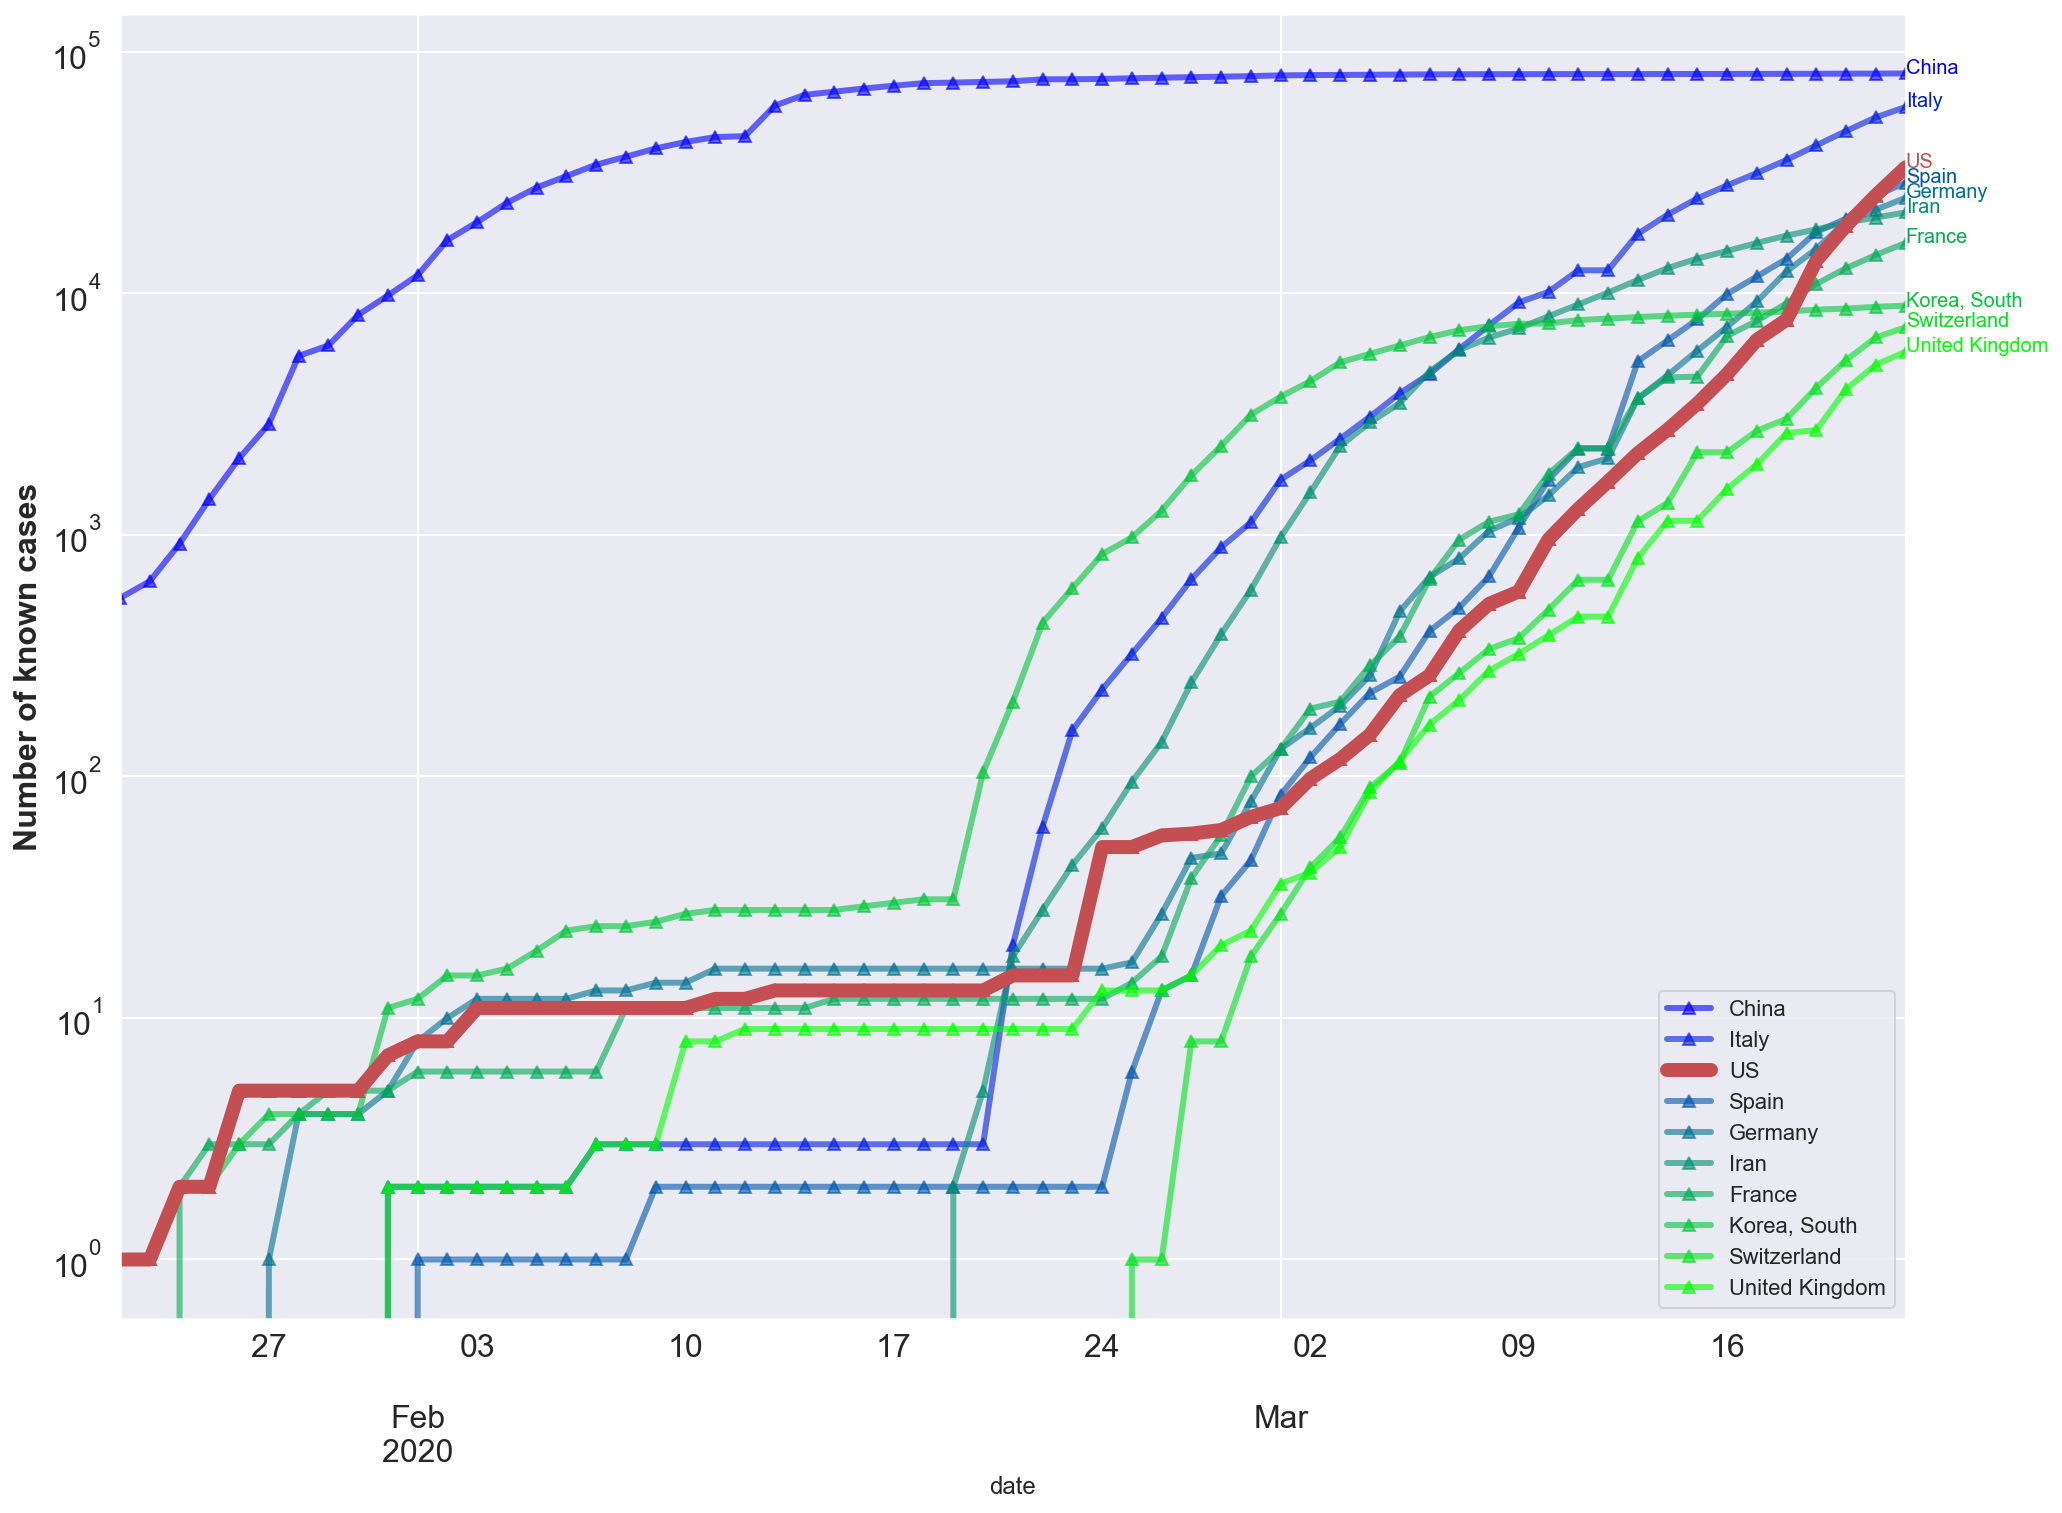

In [6]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_palette("PuBuGn_d")
top10_countries = get_top_n_countries(df, 10)
greens = np.linspace(0, 1, top10_countries.shape[1])
blues = np.linspace(1, 0, len(greens))
reds = np.zeros_like(greens)
alpha_orig = alpha = 0.6
alphas = np.zeros_like(greens) + alpha
colors = np.array([reds, greens, blues, alphas]).T
linewidth_orig = linewidth = 3
zorder_orig = zorder = 1
for ii, country in enumerate(top10_countries):
    print(ii, country)
    color = colors[ii].reshape(-1,4)
    if country == "US":
        color = 'r'
        alpha = 1
        linewidth = 7
        zorder = 2
    top10_countries[country].plot(
        ax=ax, color=color, logy=True,
        linewidth=linewidth, alpha=alpha, marker='^',
        fontsize=16, zorder=zorder
    )
    if not isinstance(color, str):
        color = color[0][:3]
    plt.text(top10_countries[country].index[-1], top10_countries[country].iloc[-1], country,
             color=color, fontsize=10)
    linewidth = linewidth_orig
    alpha = alpha_orig
    zorder = zorder_orig
plt.ylabel("Number of known cases", fontsize=16, fontweight='bold')
plt.legend();

# States

In [7]:
def get_top_n_states(_df, nn, transpose=True):
    states = df[df['country'] == "US"].copy()
    states = (
        states
        .sort_values(states.columns[-1], ascending=False)
        .drop('country', axis=1)
        .rename(columns={'province_or_state': 'state'})
        .set_index('state')
    )
    top_n = states.head(nn)
    if transpose:
        result = (
            top_n
            .T
            .reset_index()
            .rename(columns={"index": "date"})
            .set_index("date")
        )
        result.index = pd.to_datetime(result.index)
    else:
        result = top_n
    return result

In [8]:
get_top_n_states(df, 10)

state,New York,Washington,New Jersey,California,Illinois,Michigan,Louisiana,Florida,Massachusetts,Texas
date,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-03-18,2495,1014,267,751,162,83,257,314,218,173
2020-03-19,5365,1376,742,952,422,334,392,417,328,260
2020-03-20,8310,1524,890,1177,585,552,538,563,413,394


0 New York
1 Washington
2 New Jersey
3 California
4 Illinois
5 Michigan
6 Louisiana
7 Florida
8 Massachusetts
9 Texas


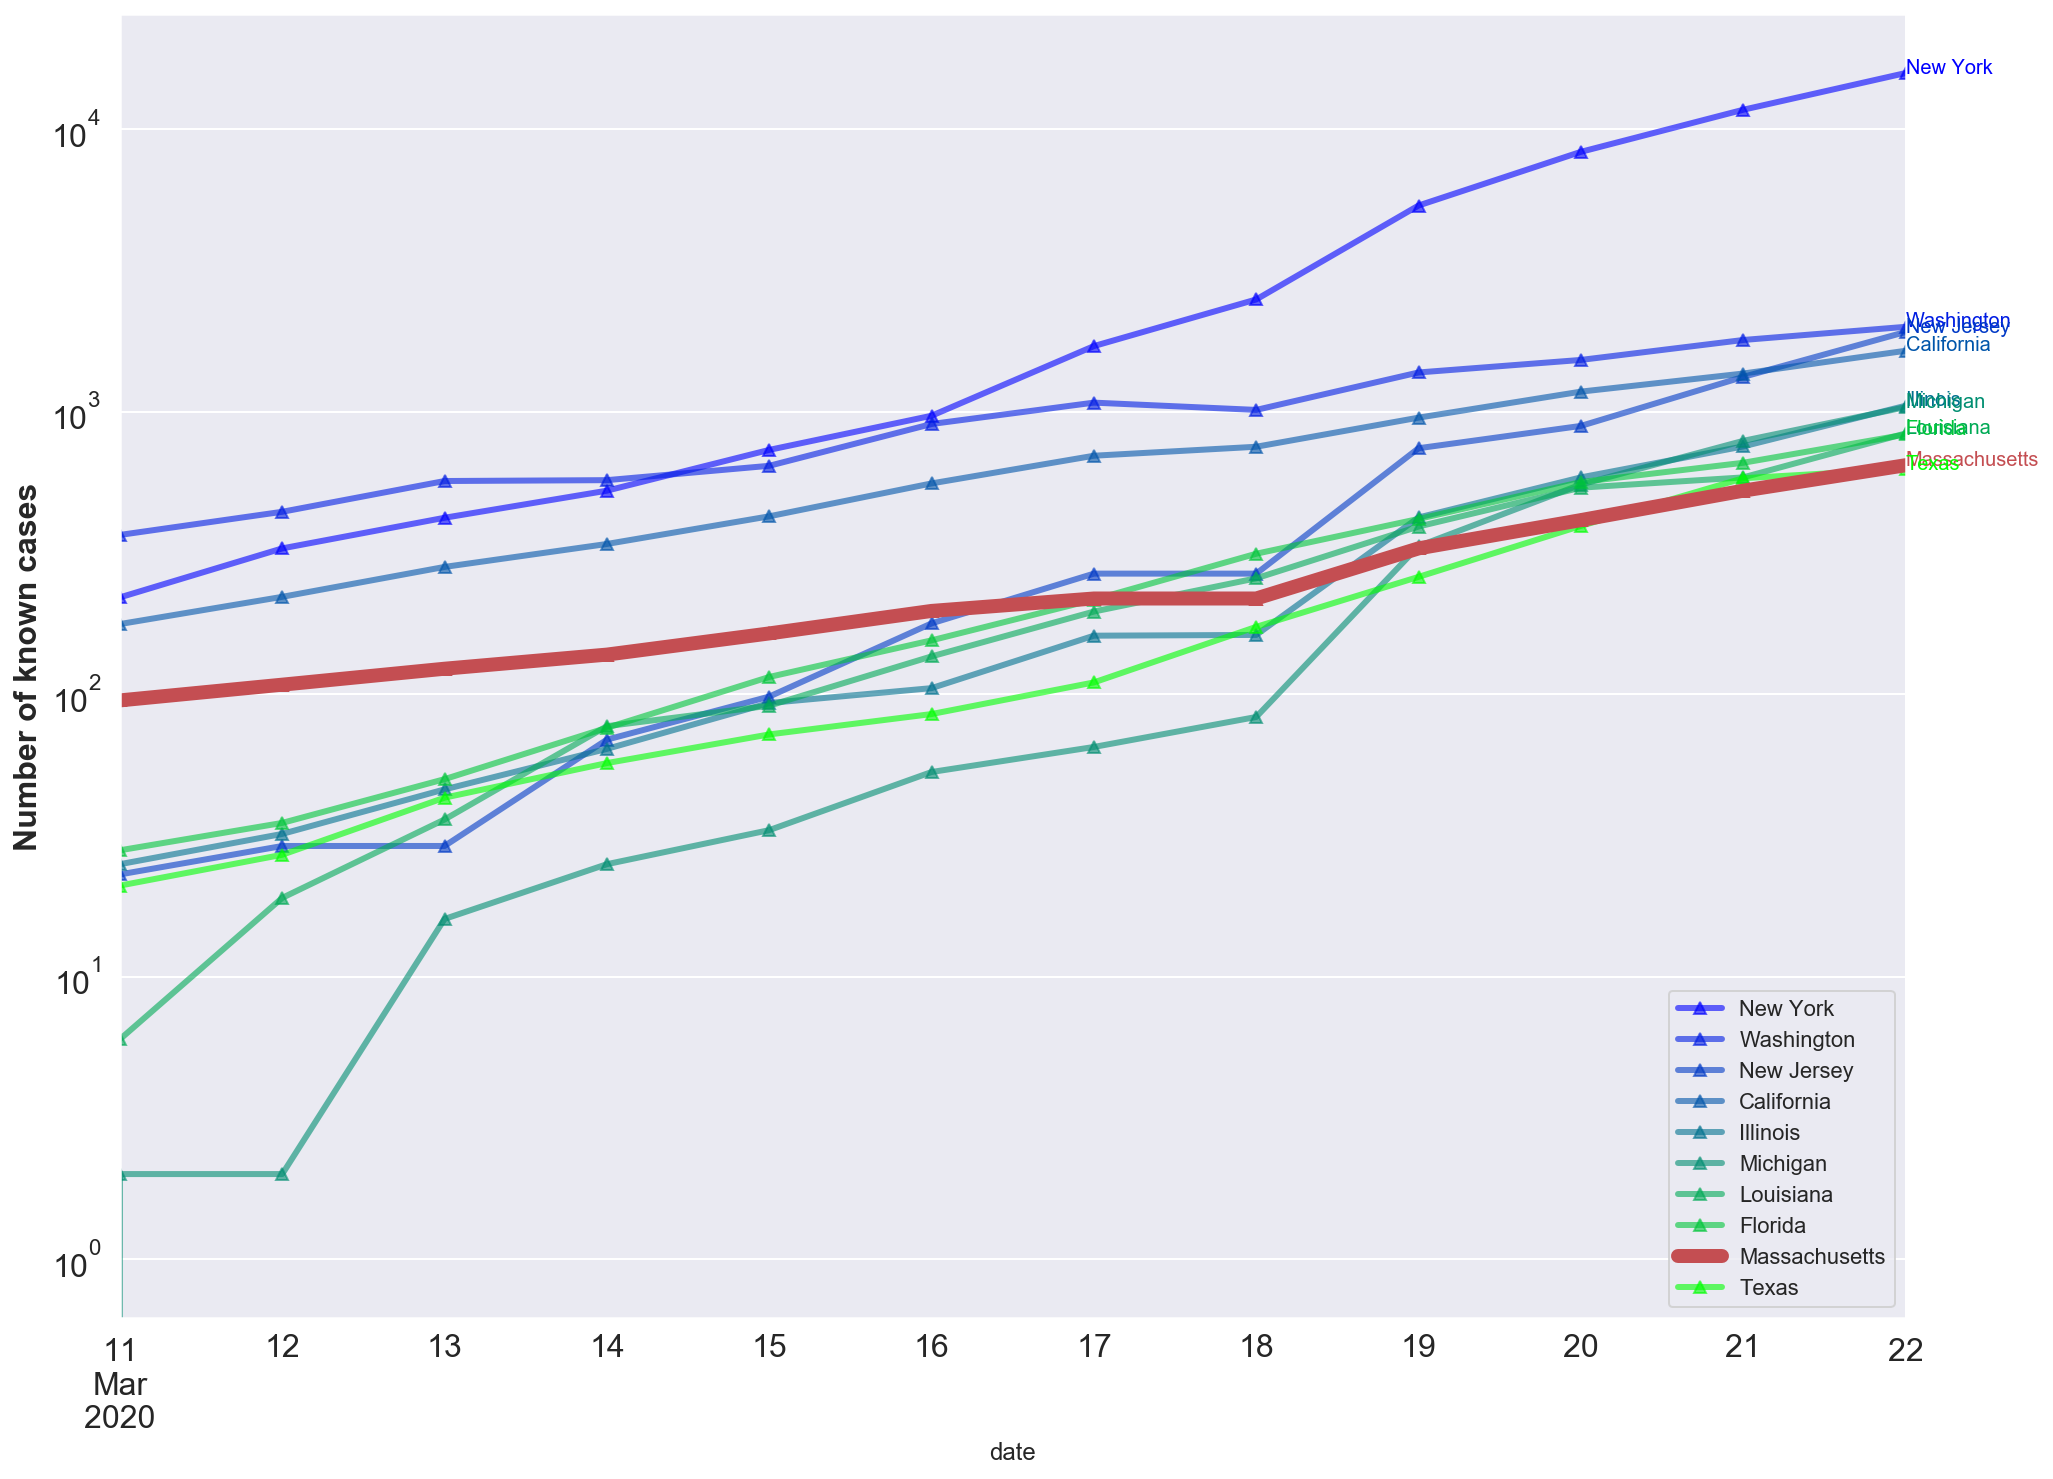

In [9]:
fig, ax = plt.subplots(figsize=(16, 12))
sns.set_palette("PuBuGn_d")
top10_states = get_top_n_states(df, 10)
greens = np.linspace(0, 1, top10_states.shape[1])
blues = np.linspace(1, 0, len(greens))
reds = np.zeros_like(greens)
alpha_orig = alpha = 0.6
alphas = np.zeros_like(greens) + alpha
colors = np.array([reds, greens, blues, alphas]).T
linewidth_orig = linewidth = 3
zorder_orig = zorder = 1
for ii, state in enumerate(top10_states):
    print(ii, state)
    color = colors[ii].reshape(-1,4)
    if state == "Massachusetts":
        color = 'r'
        alpha = 1
        linewidth = 7
        zorder = 2
    top10_states[state].plot(
        ax=ax, color=color, logy=True,
        linewidth=linewidth, alpha=alpha, marker='^',
        fontsize=16, zorder=zorder
    )
    if not isinstance(color, str):
        color = color[0][:3]
    plt.text(top10_states[state].index[-1], top10_states[state].iloc[-1], state,
             color=color, fontsize=10)
    linewidth = linewidth_orig
    alpha = alpha_orig
    zorder = zorder_orig
plt.ylabel("Number of known cases", fontsize=16, fontweight='bold')
xlim = plt.xlim()
plt.xlim(datetime.datetime(2020, 3, 11), xlim[1])
plt.legend(loc='lower right');